In [25]:
# Importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [27]:
# Read the data

df=pd.read_csv('santander-train.csv', nrows=20000)

df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [28]:
X=df.drop('TARGET', axis=1)

y=df['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [29]:
# Do train test split at start only to avoid overfitiing problem.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)


# Remove constant, quasi constant and duplicated features

In [30]:
def RemoveConstantFeatures(X_df, X_train): 
    const_filter=VarianceThreshold(threshold=0)
    const_filter.fit(X_train)
    X_train_filter=const_filter.transform(X_train)
    
    return X_train_filter

# Calling function : RemoveConstantFeatures
X_train_filter=RemoveConstantFeatures(X,X_train)
X_test_filter=RemoveConstantFeatures(X,X_test)

In [31]:
X_train_filter.shape, X_test_filter.shape

((16000, 291), (4000, 282))

In [32]:
def RemoveQuasiConstantFeatures(X_train_filter): 
    const_filter=VarianceThreshold(threshold=0.01)
    const_filter.fit(X_train_filter)
    X_train_quasi_filter=const_filter.transform(X_train_filter)
   
    return X_train_quasi_filter

# Calling function : RemoveQuasiConstantFeatures
X_train_quasi_filter=RemoveQuasiConstantFeatures(X_train_filter)
X_test_quasi_filter=RemoveQuasiConstantFeatures(X_test_filter)

In [33]:
X_train_quasi_filter.shape,X_test_quasi_filter.shape

((16000, 245), (4000, 242))

In [34]:
def RemoveDuplicateFeatures(X_train): 
    # Transpose the input
    X_train_Dup_T = X_train.T
    # Convert into Pandas DataFrames
    X_train_Dup_T=pd.DataFrame(X_train_Dup_T)
    # Remove duplicate from DF
    X_Unique=X_train_Dup_T[[not index for index in X_train_Dup_T.duplicated()]].T
    #print('RemoveDuplicateFeatures: Removed Features are :', X_train_Dup_T.duplicated().columns)
    return X_Unique

# Calling function : RemoveDuplicateFeatures    
X_train_dup_filter = RemoveDuplicateFeatures(X_train_quasi_filter)
X_test_dup_filter =RemoveDuplicateFeatures(X_test_quasi_filter) 

In [35]:
X_train_dup_filter.shape,X_test_dup_filter.shape

((16000, 227), (4000, 217))

# Mutual Information

Feature Mutual Information (Sorted):  2      0.015460
119    0.013029
91     0.012422
86     0.011059
40     0.011031
         ...   
130    0.000000
131    0.000000
132    0.000000
133    0.000000
126    0.000000
Length: 227, dtype: float64
Selected Features:  Int64Index([  2,  21,  22,  30,  40,  49,  50,  51,  58,  85,  86,  91,  95,
            100, 101, 105, 119, 125, 127, 177, 182, 209, 210, 211, 212],
           dtype='int64')


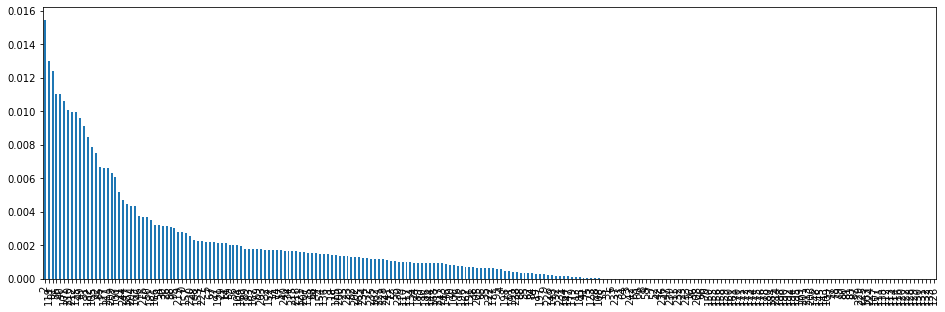

In [53]:
# --------------------- Feature Selection of Filter Method using Mutual Information gain --------------------- 
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest

def mutualInformationClassifier(X_train_dup_filter, y_train): 
    mi=mutual_info_classif(X_train_dup_filter, y_train)
    mi=pd.Series(mi)
    mi.index=X_train_dup_filter.columns
    mi.sort_values(ascending=False, inplace=True)
    print('Feature Mutual Information (Sorted): \n', mi)
    mi.plot.bar(figsize=(16,5))
    
    # Based on above graph, modify the value of K which is top 25 features
    sel_ = SelectKBest(mutual_info_classif, k=25).fit(X_train_dup_filter, y_train)
    X_train_dup_filter.columns[sel_.get_support()]
    print('Selected Features: ', X_train_dup_filter.columns[sel_.get_support()])
    X_train_dup_filter_mi=sel_.transform(X_train_dup_filter)
    return X_train_dup_filter_mi
    
X_train_dup_filter_mi=mutualInformationClassifier(X_train_dup_filter, y_train)

In [50]:
X_train_dup_filter_mi.shape

(16000, 25)